<a href="https://colab.research.google.com/github/HemantSingh108/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



## **Project Type**    - Regression
## **Contribution**    - Individual
## **Team Member 1 -** Hemant Singh Dangi


# **Project Summary -**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The goal is to design different Machine Learning models and come up with the model which gives the best prediction of rented bike count required to be supplied at each hour. Before designing any ML model, we require to clean the data and draw significant insights from the data. To begin with we view the dataset including its description, various columns, number of null values, different categorical variables, unique value count, shape of the dataset and different statistical parameters. We begin by removing the null values if any. Then we plot the distributions of each variable to see how the data is distributed. We get an idea about the skewness of the data. Ideally, we want our data to have a normal distribution. If there is skewness in the data we go for feature transformation. Visualizing different kinds of transformation on the skewed variables helps you to determine the best transformation for your features. We can check the numerical value of skewness of the variables using the .skew() method. We also plot box plot of the features to check the outliers in the data. Outliers play a significant role in data analysis as they effect the statistical parameters. Then we plot the correlation heatmap to check for collinear features. Since collinearity is not desired in the data, we linearly combine the collinear features or drop them.. In our project, Year and Dew point temperature have t he highest multicorrelation hence they’re dropped. Moving ahead, we analyze the categorical variables and perform one hot encoding for conversion. The original categorical columns are dropped and we get our final clean dataset. A feature importance graph is plotted to show which features contribute the most to our model. Then we perform the splitting of the data into train-test sets and perform feature scaling. Then we apply LR, Decision Tree, , XG Boost regression and  Gradient Boosting to get the best model for our business problem. We calculate the evaluation metrics R2 score, adjusted R2 and RMSE for each model. Then a model comparison chart is plotted to compare the metrics.XGBoost with Hypertunning gives the best results of all the models for the given business problem with R2 score=0.92 and adjusted R2 of 0.9267. Also it has the lowest RMSE of all the models which equals 4.8.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## **Business Goal**
- Our goal is to use and optimize Machine Learning models that effectively predict the number of ride-sharing bikes that will be used in any given 1 hour time-period, using available information.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


!pip install bayesian-optimization



!pip install scikit-optimize



import missingno as msno
sns.set()

from skopt import BayesSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from time import time
from sklearn.metrics import r2_score
import xgboost as xgb

from datetime import datetime as dt

from sklearn.model_selection import cross_val_score
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
path = '/content/drive/MyDrive/Projects/Bike_Sharing_Demand_Prediction/Seoul_Bike_Data.csv'
Bike = pd.read_csv(path, encoding = 'unicode_escape')



### Dataset First View

In [ ]:
# Dataset First Look
Bike.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
Bike.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
Bike.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

Bike.duplicated().sum()


0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Bike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

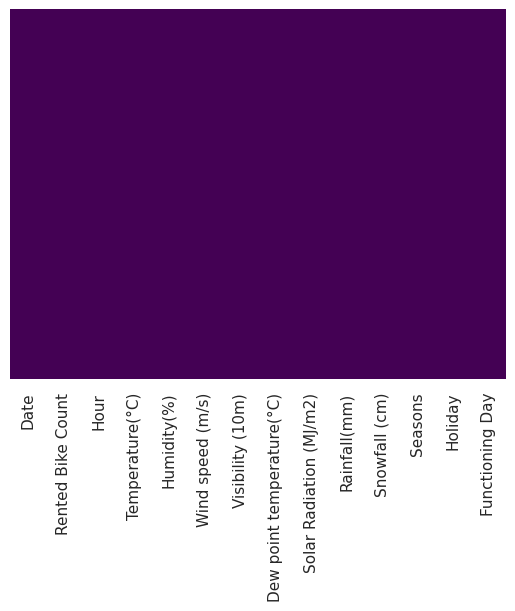

In [ ]:
# Visualizing the missing values

sns.heatmap(Bike.isnull(), yticklabels=False, cbar = False, cmap='viridis')
plt.show()

### What did you know about your dataset?

Answer Here.)This dataset is collected from December 2017 to November 2018 , exactly 364 days. that makes it 1 year of time span
This dataset contains 8760 instances and 14 attributes.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
Bike.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

Attribute Information:
- Date : year-month-day
-  Rented Bike count -  
- Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
Bike.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Checking the type of date
type(Bike['Date'][0])

str

In [ ]:
# Converting date variable to datetime datatype

Bike['Date'] = Bike['Date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [ ]:
#Splitting the Date column into date , month and year
Bike['year']=Bike['Date'].dt.year
Bike['month']=Bike['Date'].dt.month
Bike['day']=Bike['Date'].dt.day_name()

In [ ]:
#Counting days value
Bike['day'].value_counts()

Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: day, dtype: int64

In [ ]:
#creating a new column of "weekdays_weekend" 
Bike['weekdays_weekend']=Bike['day'].apply(lambda elem :1 if elem=='Saturday' or elem=='Sunday' else 0)
Bike.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  year  month     day  weekdays_weekend  
0             Yes  2017     12  Friday                 0  
1             Yes  2017     12  Friday                 0  
2             Yes  2017     12  Friday                 0  
3             Yes  2017     12  Friday                 0  
4             Yes  2017     12  Friday                 0

In [ ]:
#Drop the column "Date","day","year"

Bike=Bike.drop(columns=['Date','day','year'],axis=1)

In [ ]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  Bike[col]=Bike[col].astype('category')

### What all manipulations have you done and insights you found?

Answer Here.)

- First we split the date column into day ,month and year

- We have data from December 2017 to November 2018, so this is basicaly 1 year of span, so we can ignore this year column

- Then we split our days into weekdays amd weekends as this make more sense than using all the 7 days as labels, weekdays and wekends can be more helpful. As literature survey says that generaly we can have more bike sharing in weekdays than weekends

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***

* ***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data type then we proceed with the numerical data type***

#### Chart - 1

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

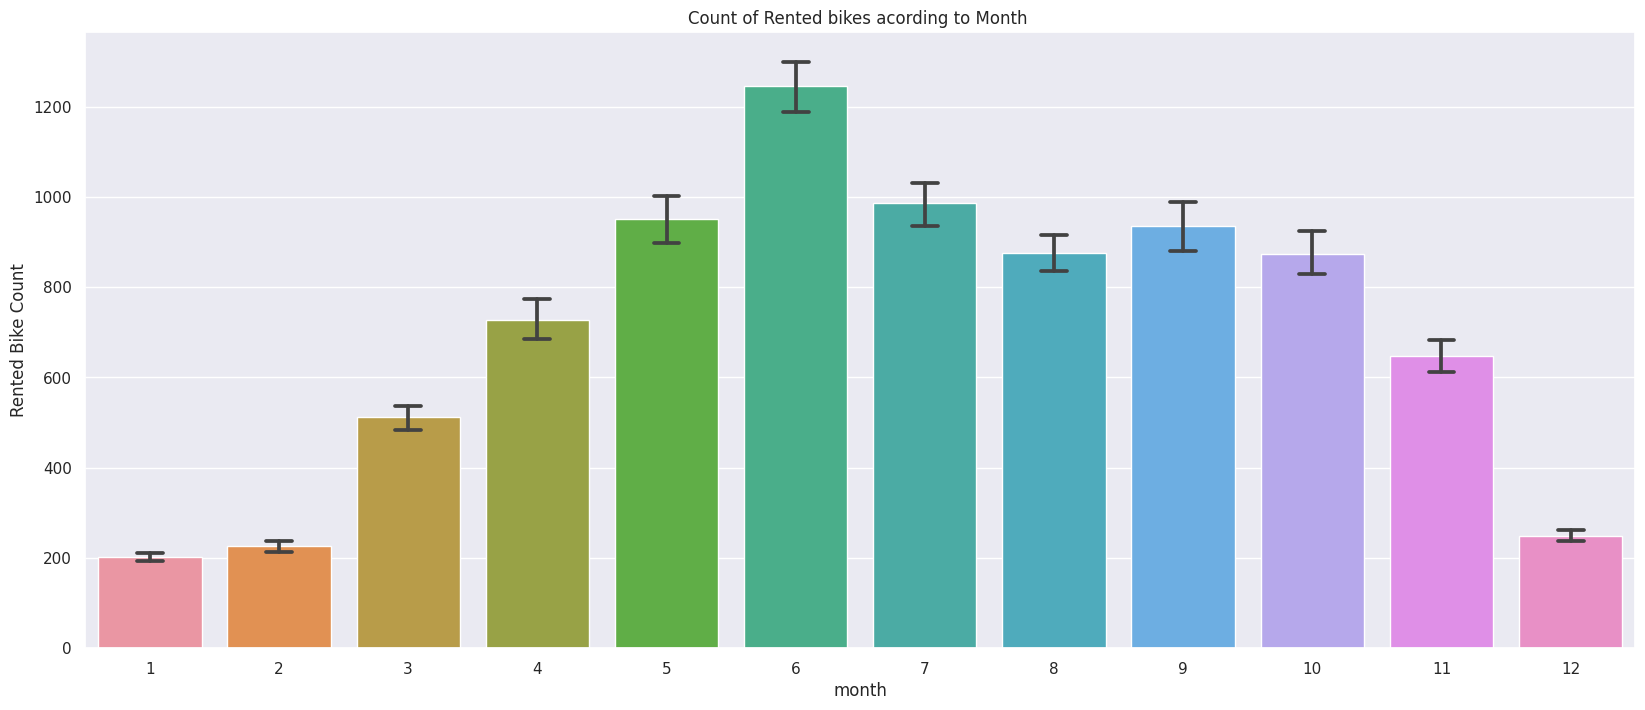

In [ ]:
# Chart - 1 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

##### 1. Why did you pick the specific chart?

Answer Here.) To analysis and count of find Rented bikes according to Month.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.)  * ***From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes,  the gained insights help creating a positive business impact.

#### Chart - 2

<Axes: xlabel='weekdays_weekend', ylabel='count'>

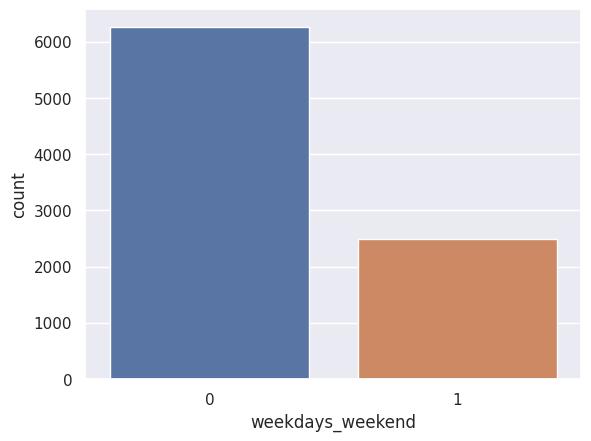

In [ ]:
# Chart - 2 

sns.countplot(x=Bike['weekdays_weekend'])



##### 1. Why did you pick the specific chart?

Answer Here.) To count the number of weekdays and weekends.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.)**There are 6264 weekdays and 2496 weekends days.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.)  Yes,  the gained insights help creating a positive business impact.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
Bike.groupby(['weekdays_weekend'])['Rented Bike Count'].mean()

weekdays_weekend
0    719.448914
1    667.342147
Name: Rented Bike Count, dtype: float64

[Text(0.5, 1.0, 'Average demand of rented bikes in weekdays and weekends')]

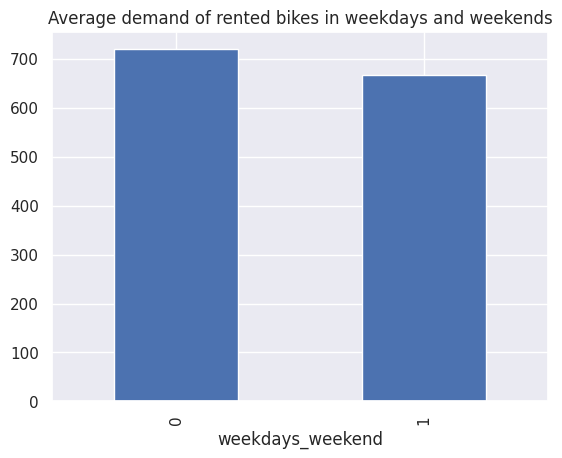

In [ ]:
Bike.groupby(['weekdays_weekend'])['Rented Bike Count'].mean().plot.bar().set(title='Average demand of rented bikes in weekdays and weekends')

##### 1. Why did you pick the specific chart?

Answer Here.) To plot the average demand of rented bikes aacording to weeks.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.) **Demand of rented bike is high during weekdays than weekends.**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes this insight will help business to create a postive impact.

#### Chart - 4

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

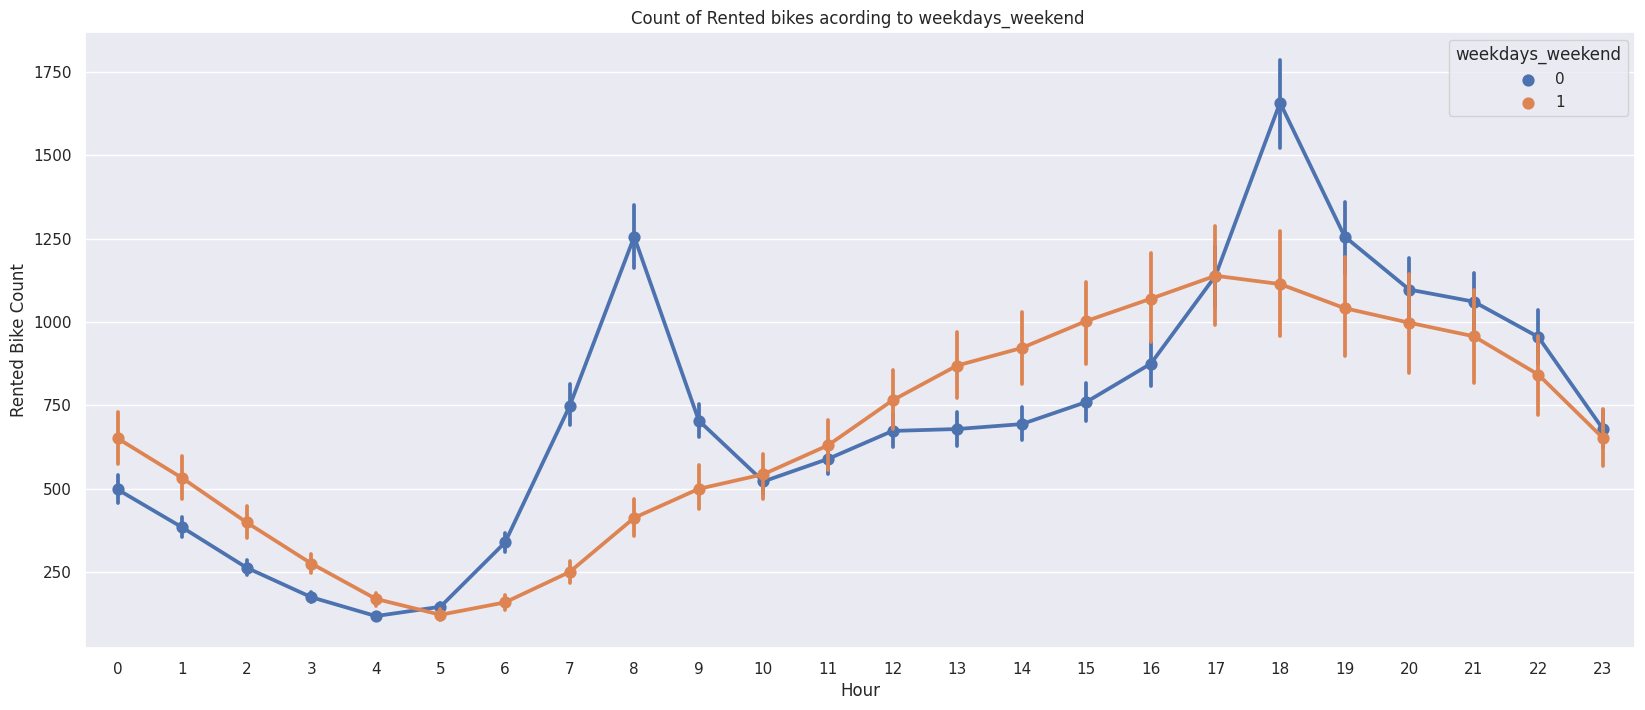

In [ ]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=Bike,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

##### 1. Why did you pick the specific chart?

Answer Here.)To find Count of Rented bikes acording to weekdays_weekend.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.) ***From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.***

 ***Peak Time are 7 am to 9 am and 5 pm to 7 pm***

 ***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes,  the gained insights help creating a positive business impact.

#### Chart - 5

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

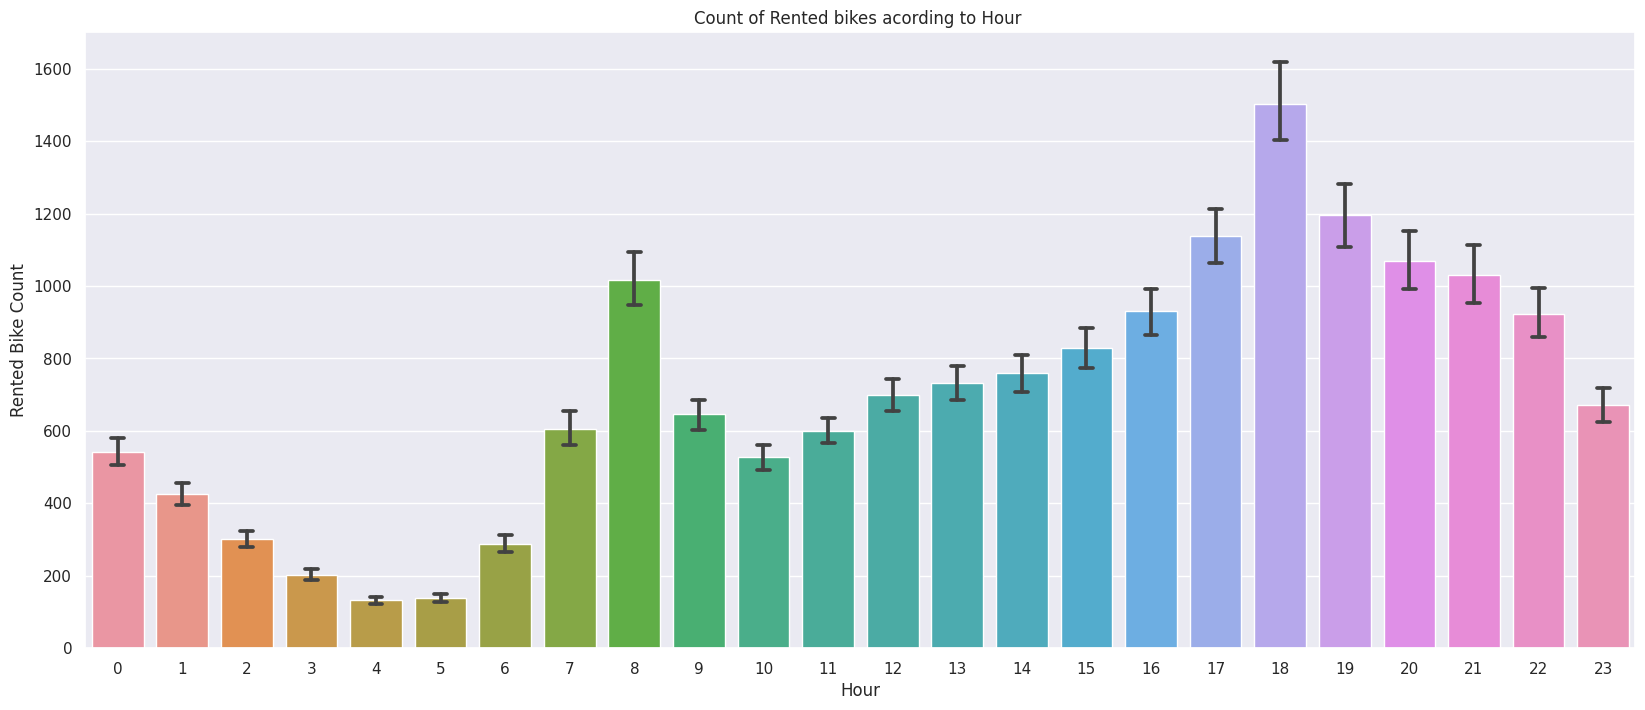

In [ ]:
# Chart - 5 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

##### 1. Why did you pick the specific chart?

Answer Here.)To find Count of Rented bikes acording to Hour.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.) - ***In the above plot which shows the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.***   

---



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes,  the gained insights help creating a positive business impact.

#### Chart - 6

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

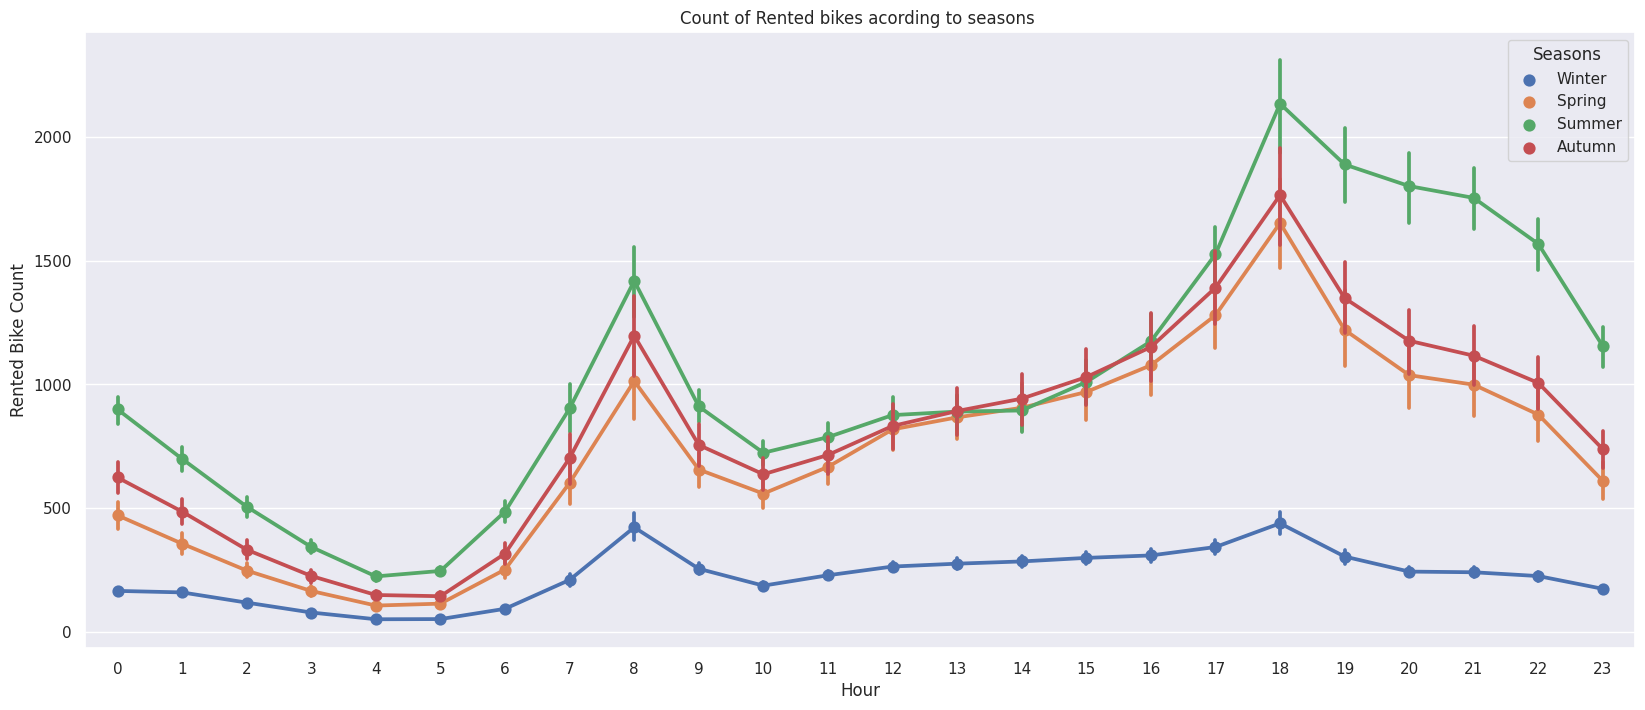

In [ ]:
# Chart - 6 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=Bike,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

##### 1. Why did you pick the specific chart?

Answer Here.)To find Count of Rented bikes acording to Seasons.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.) ***In the above point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.***
* ***In winter season the use of rented bike is very low because of snowfall.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes,  the gained insights help creating a positive business impact.

#### Chart - 7

<Axes: xlabel='count', ylabel='Holiday'>

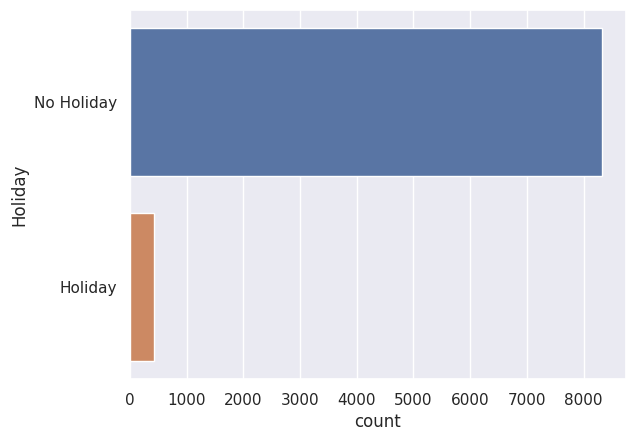

In [ ]:
sns.countplot(y=Bike['Holiday'])


##### 1. Why did you pick the specific chart?

Answer Here.) To find analysis and count Number of holidays.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.)The No Holiday count is - 8328 and 432 Holiday. 






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes,  the gained insights help creating a positive business impact.

#### Chart - 8

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

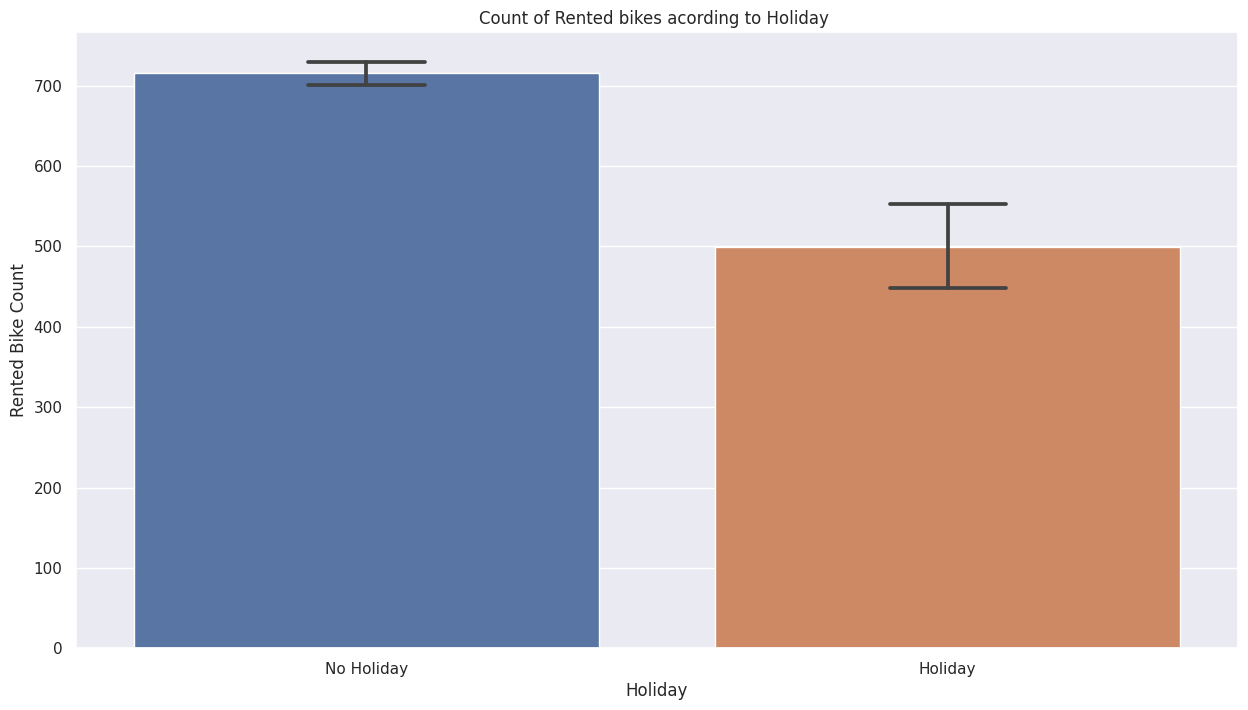

In [ ]:
# Chart - 8 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=Bike,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 1. Why did you pick the specific chart?

Answer Here.) To plot the average demand of rented bikes.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here.) The demand of rented bikes in more in normal days(no holiday).**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes this insight will help business to create a positive impact.

#### Chart - 9

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

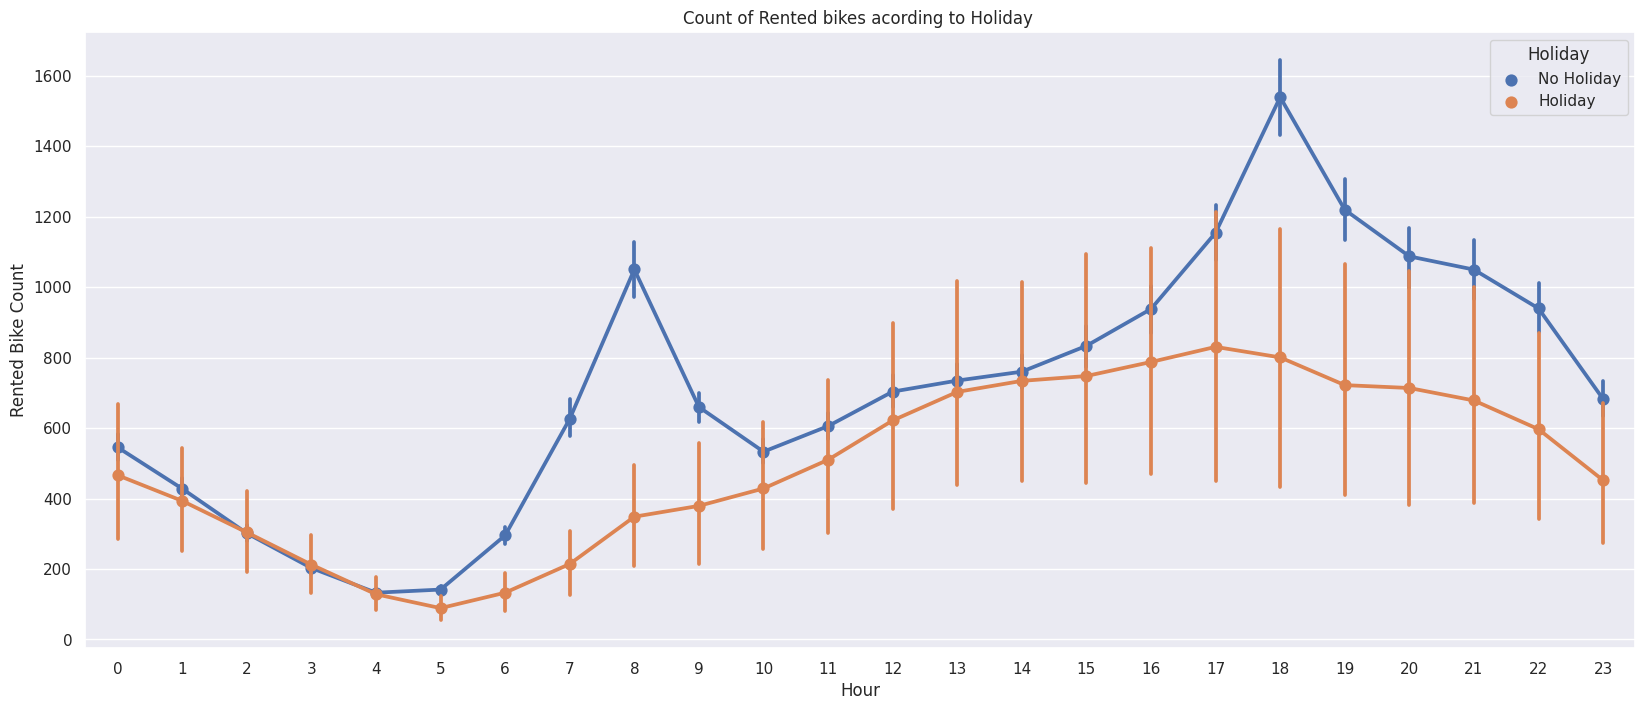

In [ ]:
# Chart - 9 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=Bike,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 1. Why did you pick the specific chart?

Answer Here.)To find /Count of Rented bikes acording to Holiday.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.) ***In the  point plot which shows the use of rented bike in a holiday, and it clearly shows that,***
* ***plot shows that in holiday people uses the rented bike from 2pm-8pm***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes,  the gained insights help creating a positive business impact.

#### Chart - 10

<Axes: xlabel='count', ylabel='Functioning Day'>

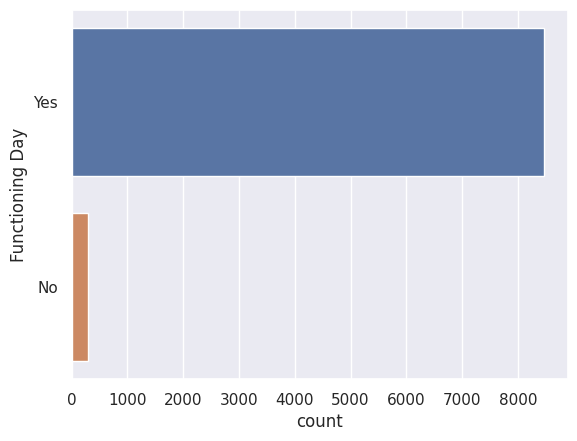

In [ ]:
# Chart - 10 visualization code
sns.countplot(y=Bike['Functioning Day'])

##### 1. Why did you pick the specific chart?

Answer Here.) To count the number of functioning days.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.) The number of functioning days are more than 8000 and no functioning days are less than 500.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes,  the gained insights help creating a positive business impact.

#### Chart - 11

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

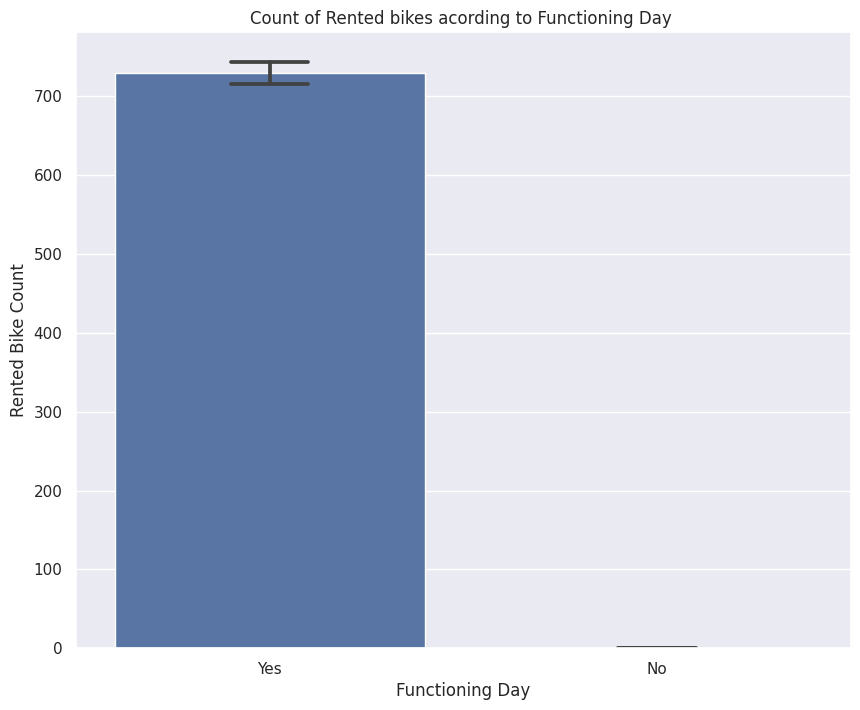

In [ ]:
# Chart - 11 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=Bike,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##### 1. Why did you pick the specific chart?

Answer Here.)Count of Rented bikes acording to Functioning Day.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.) * ***In the above bar plot which shows the use of rented bike in functioning daya or not, and it clearly shows that,***
* ***Peoples dont use reneted bikes in no functioning day.*** 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes,  the gained insights help creating a positive business impact.

#### Chart - 12

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

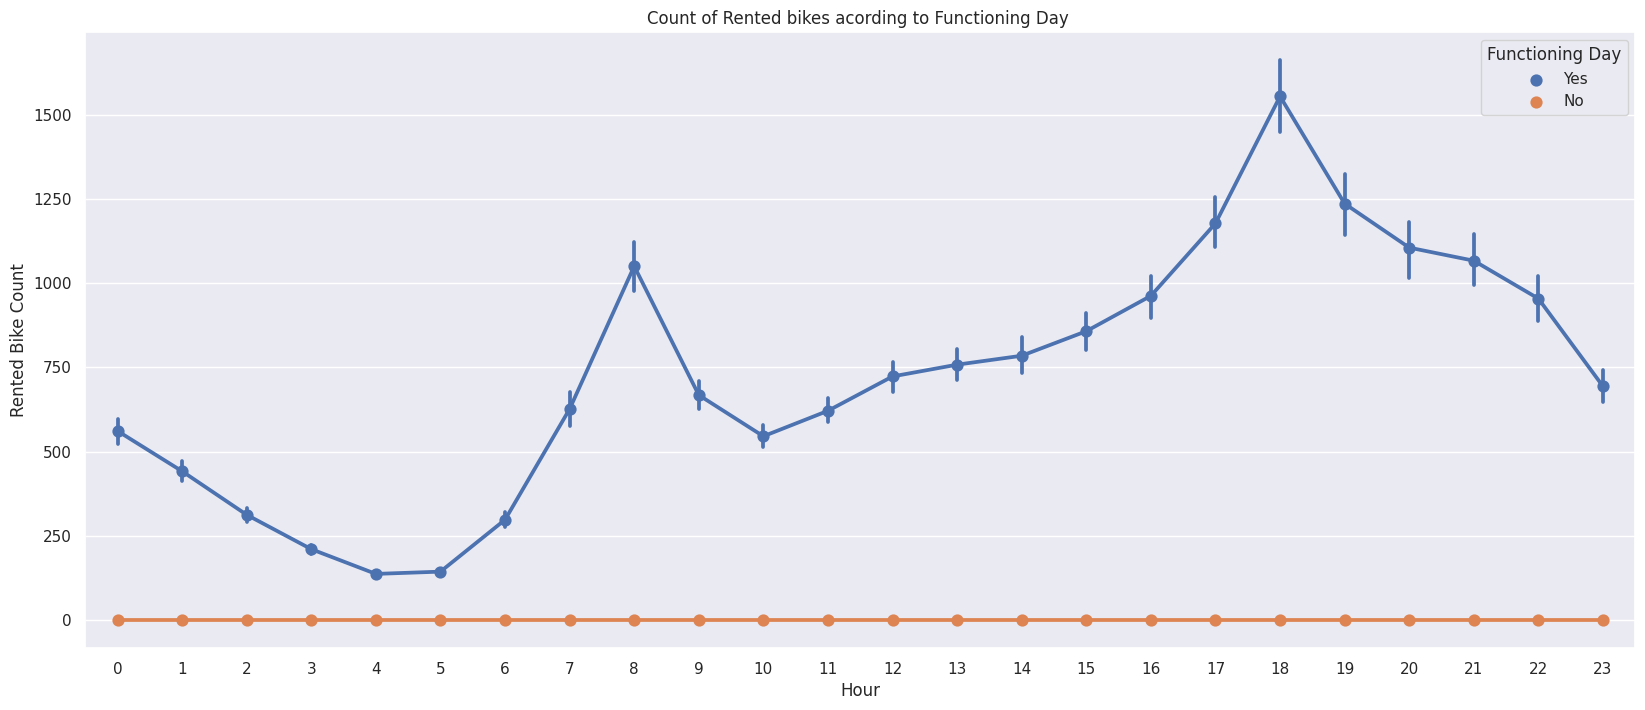

In [ ]:
# Chart - 12 visualization code
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=Bike,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

##### 1. Why did you pick the specific chart?

Answer Here.)To find 'Count of Rented bikes according to Functioning Day.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.) ***In the point plot which shows the use of rented bike in functioning daya or not, and it clearly shows that,***
* ***Peoples dont use reneted bikes in no functioning day.*** 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes,  the gained insights help creating a positive business impact.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
#assign the numerical coulmn to variavle
numerical_columns=list(Bike.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

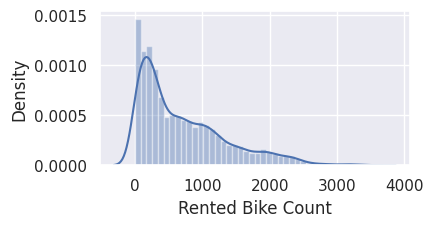

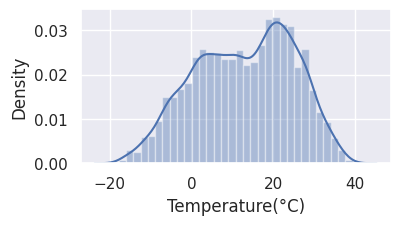

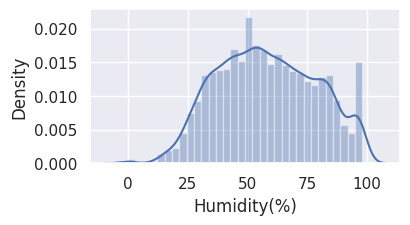

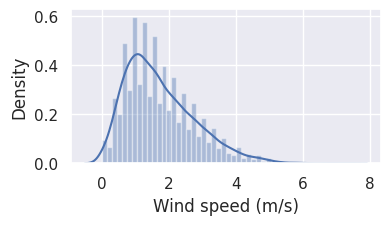

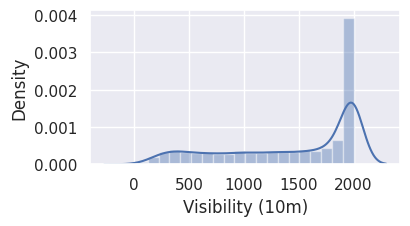

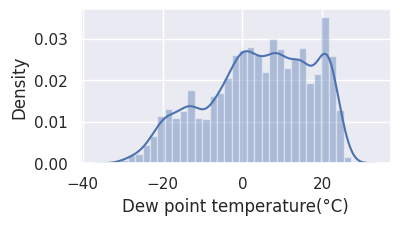

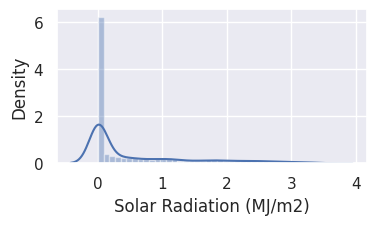

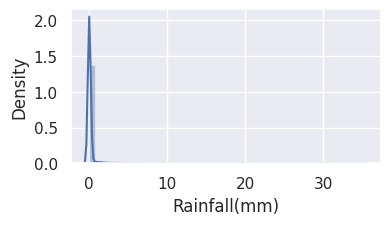

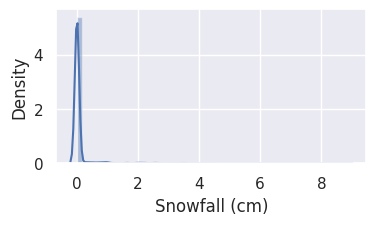

In [ ]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(4,2))
  sns.distplot(x=Bike[col])
  plt.xlabel(col)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.)To check distribution of continuous independent variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.)-  Weighted temeprature (weighted_temp) and humidity are normaly distributed.

- wind_speed, snowfall, rainfall, solar_radiation are positively skewed.

- visibility is negetively skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.) Yes,  the gained insights help creating a positive business impact.

#### Chart - 14 

<Axes: xlabel='Temperature(°C)'>

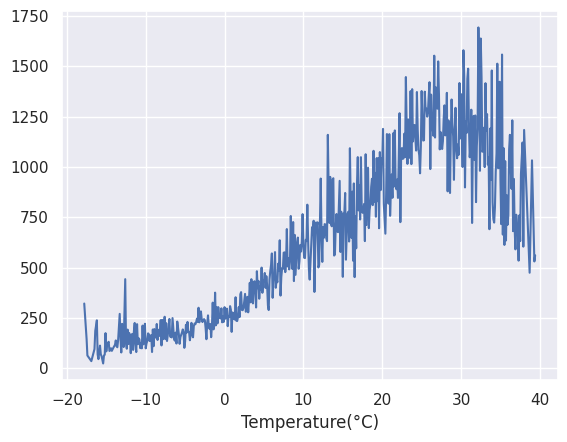

In [ ]:
# Correlation Heatmap visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
Bike.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

##### 1. Why did you pick the specific chart?

Ans) -  To analyze the relationship between "Rented_Bike_Count" and "Temperature" 

##### 2. What is/are the insight(s) found from the chart?

Ans)  - From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.

#### Chart - 15 - Pair Plot 

<Axes: xlabel='Solar Radiation (MJ/m2)'>

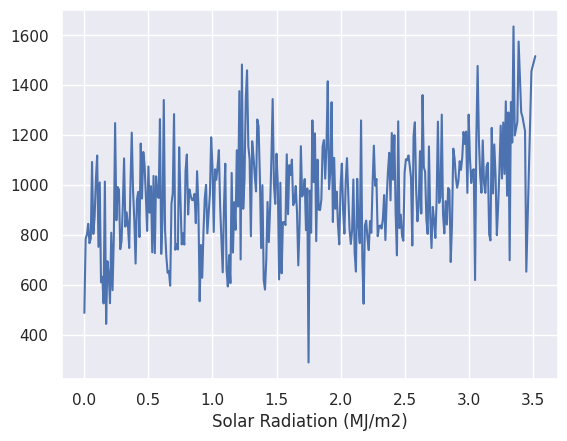

In [ ]:
# Pair Plot visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
Bike.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

##### 1. Why did you pick the specific chart?

Ans)  - To analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 

##### 2. What is/are the insight(s) found from the chart?

Ans) - From the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000

## Chart - 16

<Axes: xlabel='Snowfall (cm)'>

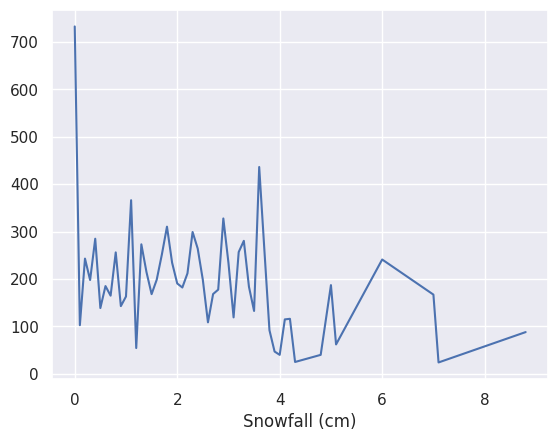

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
Bike.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

* ***We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower**

## Chart - 17

<Axes: xlabel='Rainfall(mm)'>

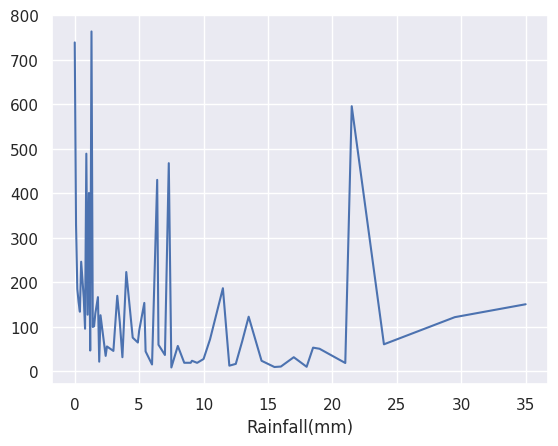

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
Bike.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()


 * ***We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes***

## Chart - 18

<Axes: xlabel='Wind speed (m/s)'>

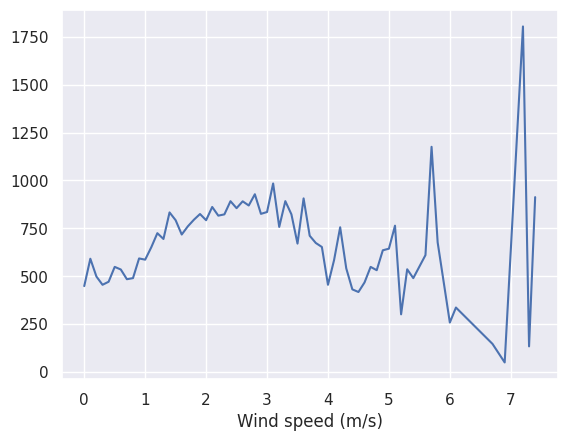

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
Bike.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

* ***We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.***

## Chart - 19

<Axes: xlabel='Dew point temperature(°C)'>

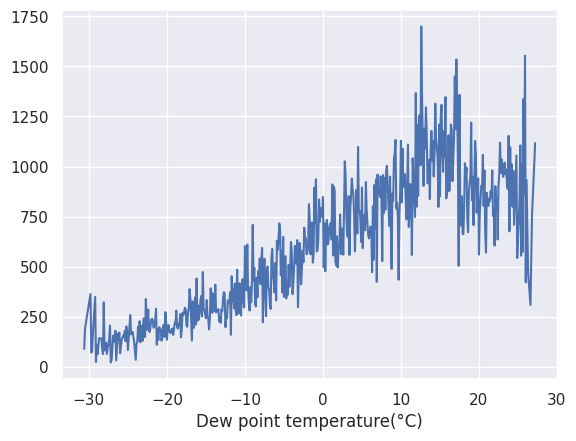

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
Bike.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()

* ***From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.***

##**Normalising Rented_Bike_Count column data**

* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

## Chart - 20

[Text(0.5, 1.0, 'Rented Bike Count')]

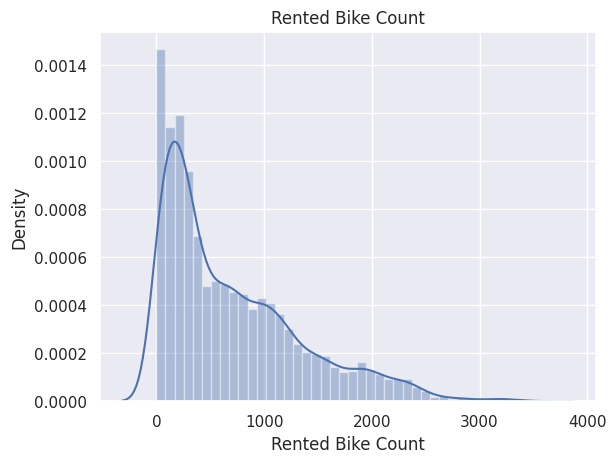

In [ ]:
# skewness of the Rented Bike Count
sns.distplot(Bike['Rented Bike Count']).set(title='Rented Bike Count')

* ***The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

## Chart - 21

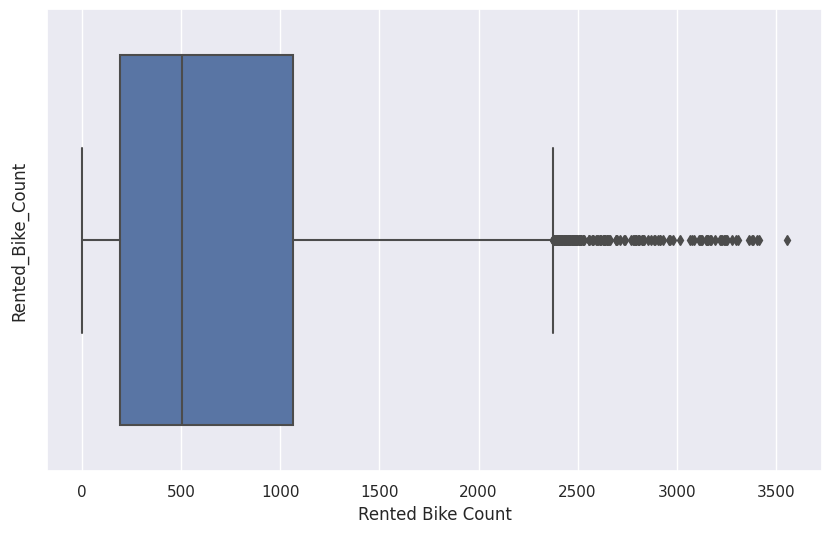

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=Bike['Rented Bike Count'])
plt.show()

* ***The above boxplot shows that we have detect outliers in Rented Bike Count column***

## Chart - 22

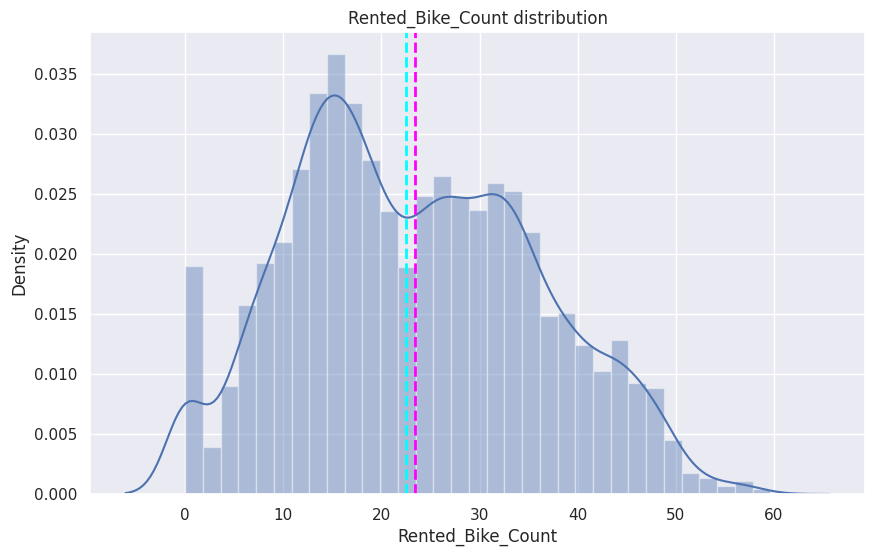

In [ ]:
# Visualizing the distribution of dependent variable after applying square root transformation
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(Bike['Rented Bike Count']))
plt.xlabel('Rented_Bike_Count')
plt.title('Rented_Bike_Count'+' distribution')
plt.axvline(np.sqrt(Bike['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(Bike['Rented Bike Count']).median(), color='cyan', linestyle='dashed', linewidth=2)

* ***Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

## Chart - 23

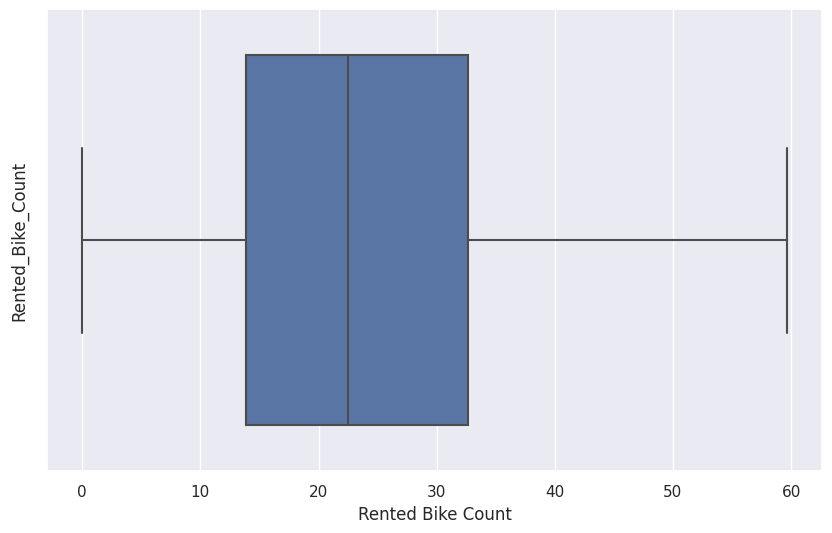

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(Bike['Rented Bike Count']))
plt.show()

* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***

# Chart - 24  - Correlation Heatmap

<Axes: >

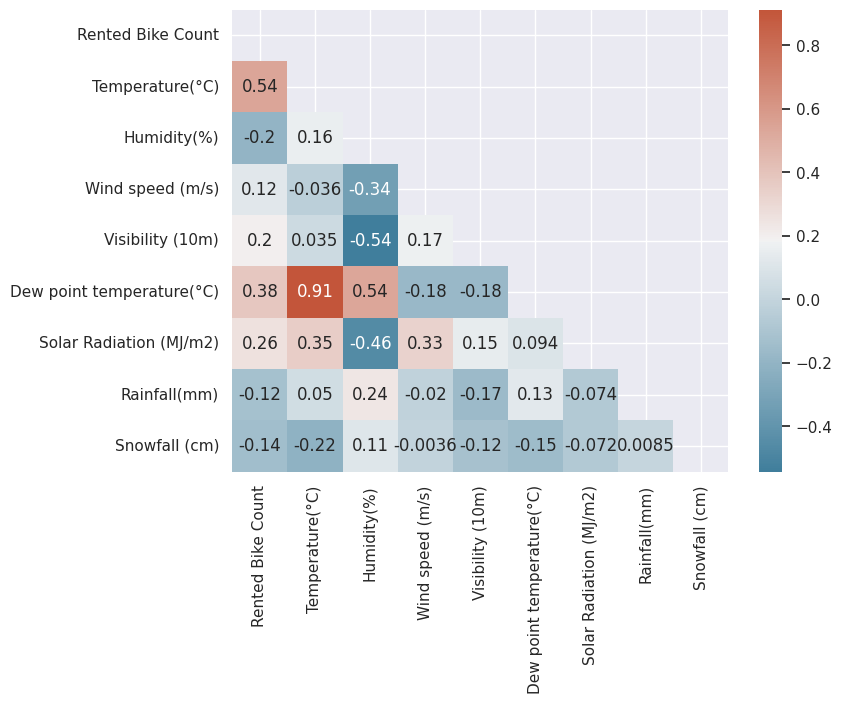

In [ ]:
# Correlation Heatmap visualization code
corr = Bike.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 6))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
     

 - Dew_point_temp and temp are highly correlated.

## Chart - 25

<Axes: xlabel='Dew point temperature(°C)', ylabel='Temperature(°C)'>

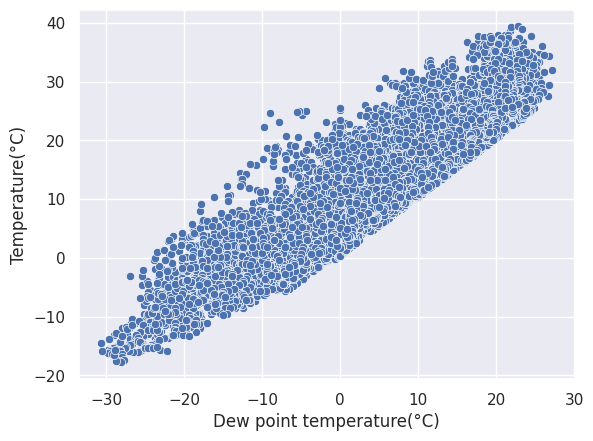

In [ ]:

# Plotting scatterplot between dew point temprature and temprature
sns.scatterplot(x=Bike['Dew point temperature(°C)'],y=Bike['Temperature(°C)'])

- Dew point temperature  and temperature are be highly correlated

#Chart - 26

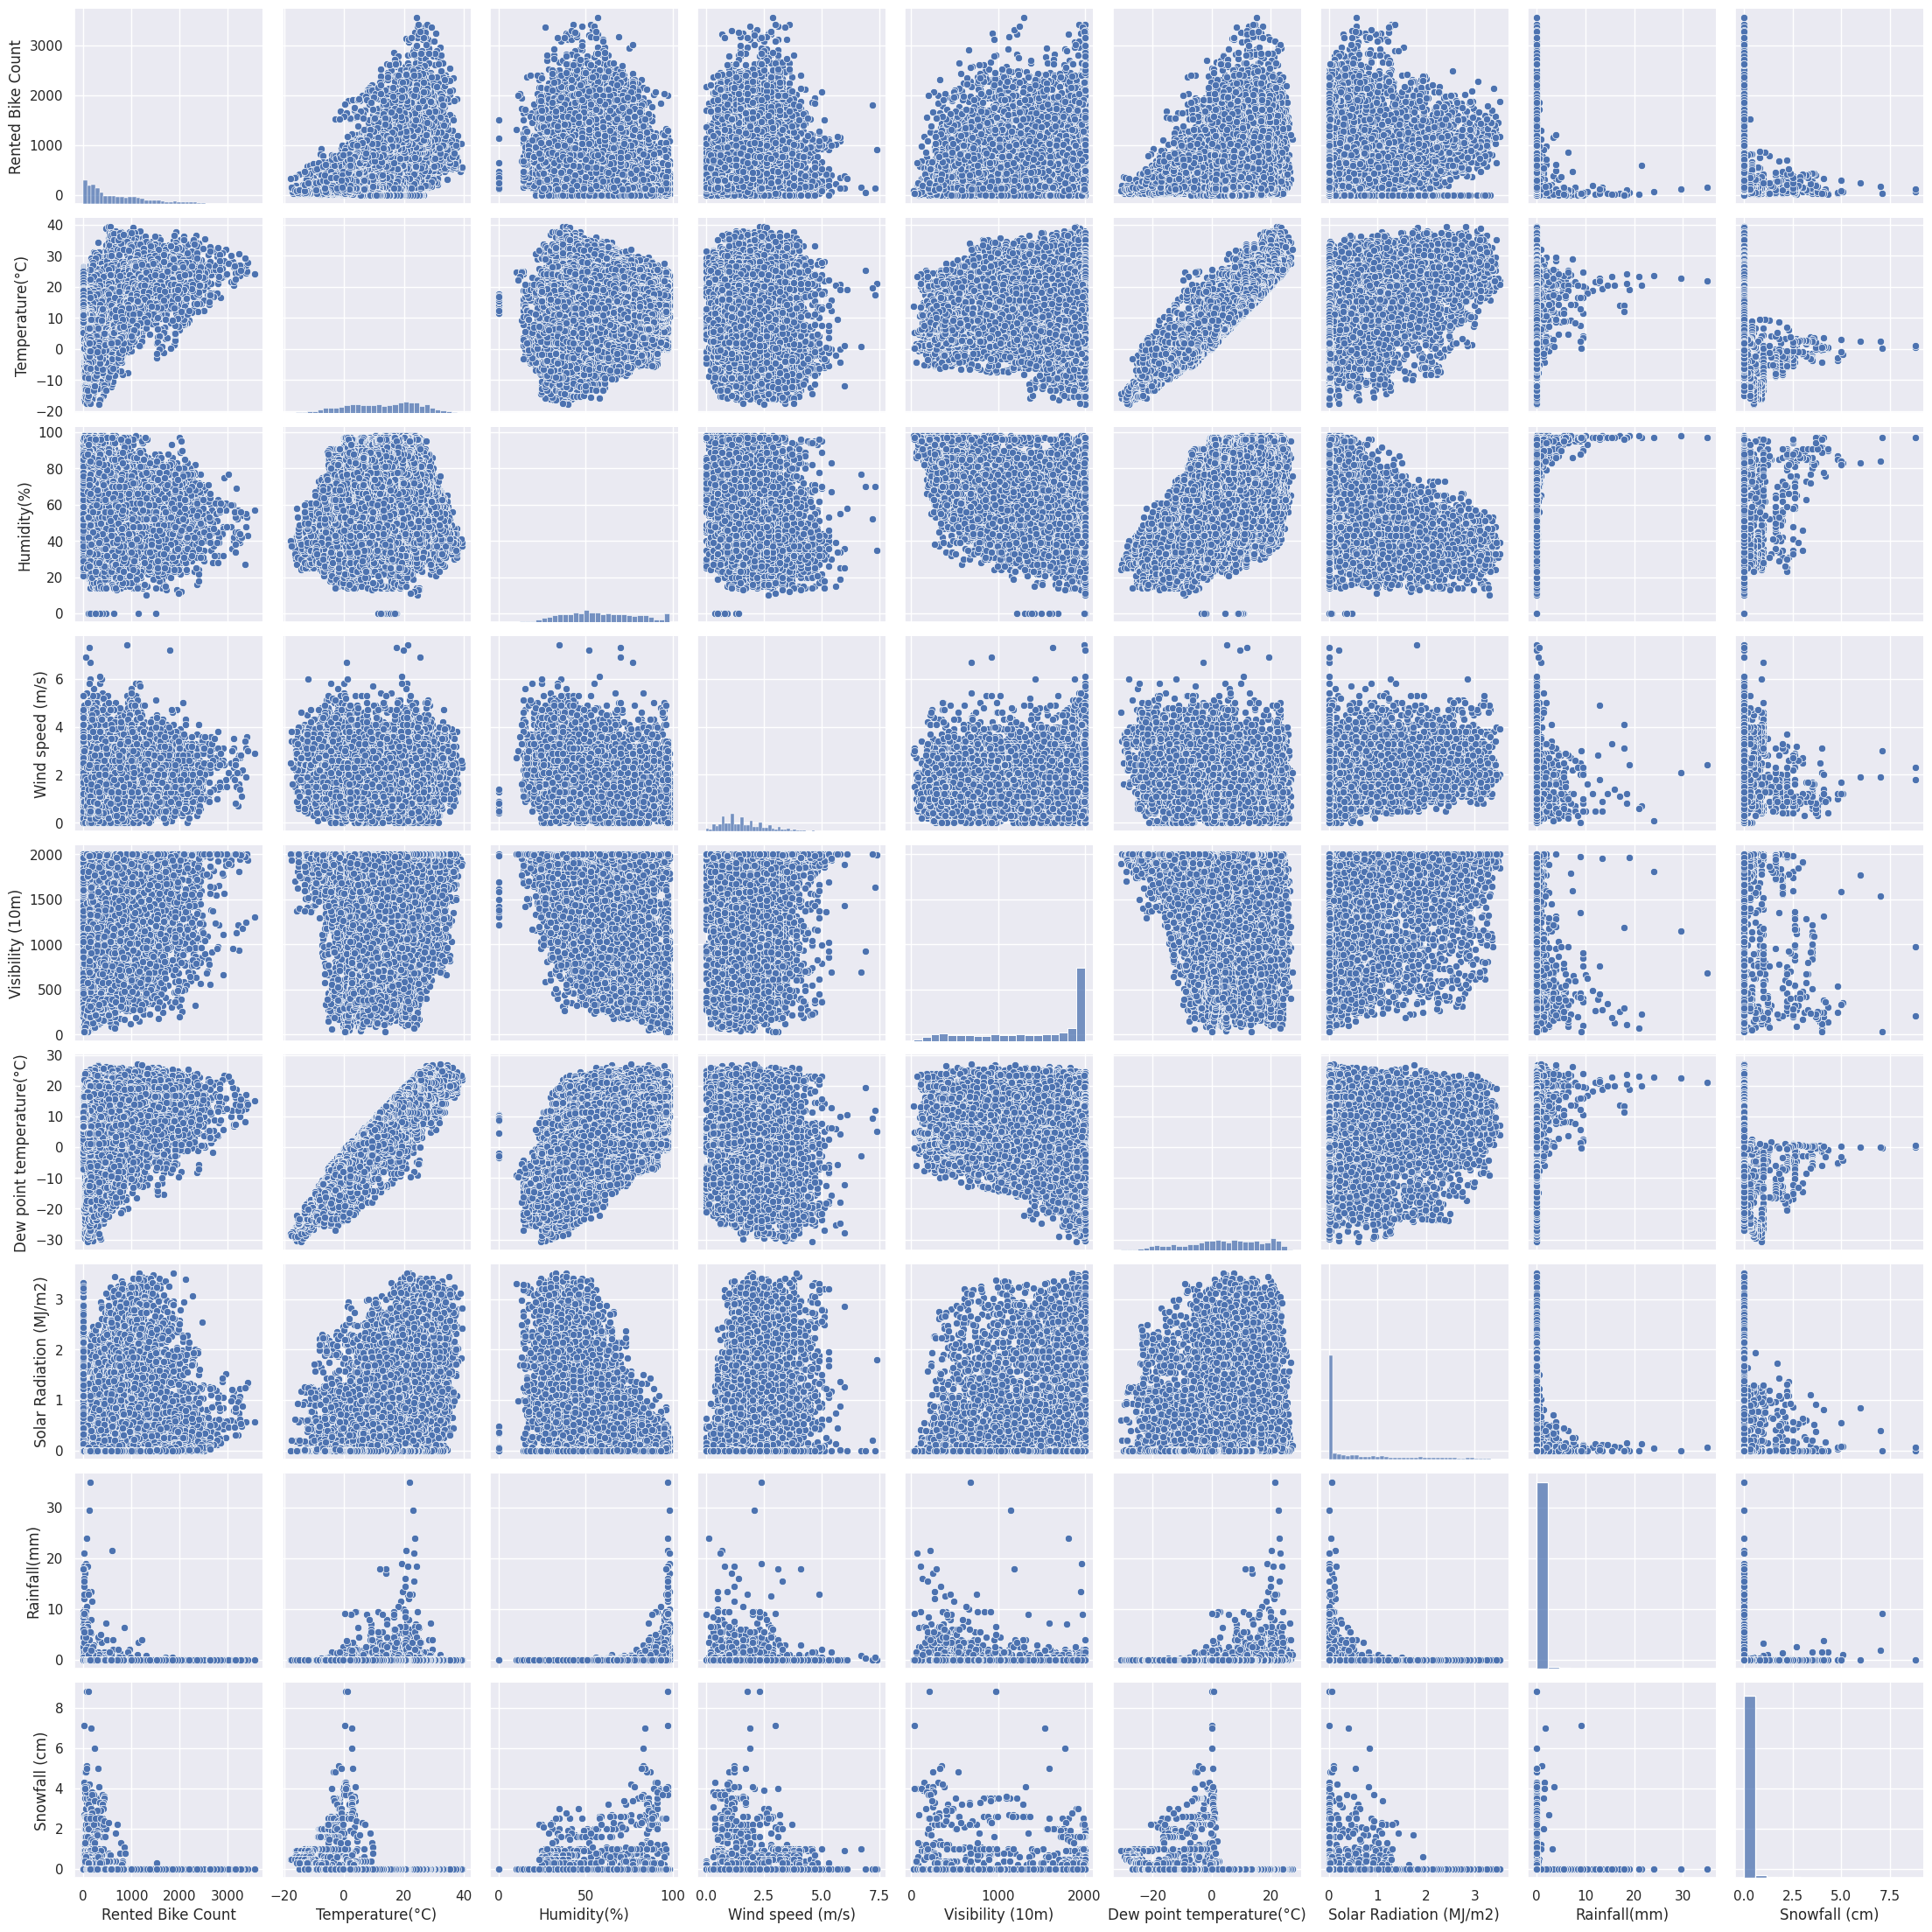

In [ ]:
# Pair Plot visualization code
sns.pairplot(Bike)

- To study the overall behaviour of all variables with each other , pair plot helps to visualize that relation easily.

- Weighted temeprature (weighted_temp) and humidity are normaly distributed.
- wind_speed, snowfall, rainfall, solar_radiation are positively skewed.
- visibility is negetively skewed

## ***5. Feature Engineering & Data Pre-processing***

* ***From the above correlation heatmap, We see that there is a positive 
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

In [ ]:
#drop the Dew point temperature column
Bike=Bike.drop(['Dew point temperature(°C)'],axis=1)

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

Ans) Since there are no missing values so this part is skipped

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Ans) Since the outlier problem was solved using the transformation technique so this part is skipped

### 3. Categorical Encoding

## Create the dummy variables 

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [ ]:
# Encode your categorical columns
#Assign all catagoriacla features to a variable
Categorical=list(Bike.select_dtypes(['object','category']).columns)
Categorical=pd.Index(Categorical)
Categorical

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

###one hot encoding

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [ ]:
#creat a copy
Bike_copy = Bike

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in Categorical:
     Bike_copy = one_hot_encoding(Bike_copy, col)
Bike_copy.head()       

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Hour_1  Hour_2  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0       0       0  ...        0        0        0        0        0        0   
1       1       0  ...        0        0        0        0        0        0   
2       0       1  ...        0        0        0        0        0        0   
3       0       0  ...        0        0        0        0        0        0   
4       0       0  ...        0        0        0        0        0        0   

   month_10  month_11  month_12  weekdays_weekend_1  
0         0         0         1                   0  
1         0         0         1                   0  
2         0         0         1                   0  
3         0         0         1                   0  
4         0         0         1                   0  

[5 rows x 48 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

Ans . )We used dummification method for encoding ur categorical variable , it creates a vector for each categories of the feature, because in this way we dont want to give importance to any particular categories of a feature by ranking them as integer encoding does

### 4. Data Transformation

**Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?**

Ans) Yes the data needs to be transformed as it is positively skewed. We have used square root transformation as it is most effective in our case to get normal distribution.

In [ ]:

# Transform Your data
independent_features=list(set(Bike.columns) -{'Rented Bike Count'})
dependent_feature=['Rented Bike Count']



In [ ]:
# Defining dependent and independent variables
X = Bike_copy.drop('Rented Bike Count',axis=1)

# applying squareroot transformation on rented_bike_count
Y = np.sqrt(Bike_copy['Rented Bike Count'])

In [ ]:
X.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0             -5.2           37               2.2              2000   
1             -5.5           38               0.8              2000   
2             -6.0           39               1.0              2000   
3             -6.2           40               0.9              2000   
4             -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_1  Hour_2  \
0                      0.0           0.0            0.0       0       0   
1                      0.0           0.0            0.0       1       0   
2                      0.0           0.0            0.0       0       1   
3                      0.0           0.0            0.0       0       0   
4                      0.0           0.0            0.0       0       0   

   Hour_3  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0       0  ...        0        0        0        0        0        0   
1       0  ...        0        0        0        0        0        0   
2       0  ...        0        0        0        0        0        0   
3       1  ...        0        0        0        0        0        0   
4       0  ...        0        0        0        0        0        0   

   month_10  month_11  month_12  weekdays_weekend_1  
0         0         0         1                   0  
1         0         0         1                   0  
2         0         0         1                   0  
3         0         0         1                   0  
4         0         0         1                   0  

[5 rows x 47 columns]

In [ ]:
Y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Ans. )NOT NEEDED

### 6. Data Splitting

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=0)
print(X_train.shape)
print(X_test.shape)

(7008, 47)
(1752, 47)


##### What data splitting ratio have you used and why? 

Ans.) 80:20 for training and testing respectively.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# defining rmse evaluation metric
def RMSE(actual,pred):
  '''
  rmse(actual_y,predicted_y)
  '''
  MSE = mean_squared_error(actual,pred)
  return np.sqrt(MSE)

In [ ]:

def ADJUS_r2(R2):
  n=X_train.shape[0]
  p=X_train.shape[1]
  Adj_R2 = 1-(1-R2)*(n-1)/(n-p-1)
  return Adj_R2

In [ ]:

# ML Model - 1 Implementation
dt_MODEL=DecisionTreeRegressor(random_state=0)
# Fit the Algorithm
dt_MODEL.fit(X_train,Y_train)
# Predict on the model
dt_MODEL_pred_Test=dt_MODEL.predict(X_test)
dt_MODEL_test_r2=r2_score(np.square(Y_test),np.square(dt_MODEL_pred_Test))
print('TESTING R2 score of Decsion Tree with Default parameters ',dt_MODEL_test_r2)
print('TESTING RMSE SCORE of Decsion Tree with Default parameters ',RMSE(np.square(Y_test),np.square(dt_MODEL_pred_Test)))
print('TESTING Adjusted R2 SCORE of Decsion Tree with Default parameters ',ADJUS_r2(dt_MODEL_test_r2))


dt_MODEL_pred_Train=dt_MODEL.predict(X_train)

dt_MODEL_train_r2=r2_score(np.square(Y_train),np.square(dt_MODEL_pred_Train))
print('TRAINING R2 score of Decsion Tree with Default parameters ',dt_MODEL_train_r2)
print('TRAINING RMSE SCORE of Decsion Tree with Default parameters ',RMSE(np.square(Y_train),np.square(dt_MODEL_pred_Train)))
print('TRAINING Adjusted R2 SCORE of Decsion Tree with Default parameters ',ADJUS_r2(dt_MODEL_train_r2))


TESTING R2 score of Decsion Tree with Default parameters  0.8353371528665243
TESTING RMSE SCORE of Decsion Tree with Default parameters  262.516896607754
TESTING Adjusted R2 SCORE of Decsion Tree with Default parameters  0.8342252054792724
TRAINING R2 score of Decsion Tree with Default parameters  1.0
TRAINING RMSE SCORE of Decsion Tree with Default parameters  0.0
TRAINING Adjusted R2 SCORE of Decsion Tree with Default parameters  1.0


In [ ]:

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV
# Using gridsearchcv to find the hyperparameters with best predictions
# A full grown tree has a max depth of 28.
DT = DecisionTreeRegressor(random_state=0)
DT_params = {
             'max_depth':np.arange(26,48,2),
             'min_samples_leaf':np.arange(4,12),
             'max_features':np.arange(4,26)
             }

# fitting model with hypertuned paramaters using grid search
DT_RandomSearch = RandomizedSearchCV(DT,
                             DT_params,n_iter=50,
                             cv=3,
                             scoring= 'neg_root_mean_squared_error')
DT_RandomSearch.fit(X_train,Y_train)
DT_Best_Params = DT_RandomSearch.best_params_

# model best parameters
DT_Best_Params

{'min_samples_leaf': 8, 'max_features': 20, 'max_depth': 28}

### Cross- Validation & Hyperparameter Tuning

In [ ]:
DT_model = DecisionTreeRegressor(
                                 max_depth=DT_Best_Params['max_depth'],
                                 min_samples_leaf=DT_Best_Params['min_samples_leaf'],
                                 max_features=DT_Best_Params['max_features'],
                                 random_state=0)
DT_model.fit(X_train,Y_train)
DT_train_pred = DT_model.predict(X_train)
DT_test_pred = DT_model.predict(X_test)

dt_model_test_r2=r2_score(np.square(Y_test),np.square(DT_test_pred))
print('TESTING R2 score of Decsion Tree Optimized ',dt_model_test_r2)
print('TESTING RMSE SCORE of Decsion Tree Optimized ',RMSE(np.square(Y_test),np.square(DT_test_pred)))
print('TESTING Adjusted R2 SCORE of Decsion Tree Optimized ',ADJUS_r2(dt_model_test_r2))

dt_model_train_r2=r2_score(np.square(Y_train),np.square(DT_train_pred))
print('TRAINING R2 score of Decsion Tree Optimized ',dt_model_train_r2)
print('TRAINING RMSE SCORE of Decsion Tree Optimized ',RMSE(np.square(Y_train),np.square(DT_train_pred)))
print('TRAINING Adjusted R2 SCORE of Decsion Tree Optimized ',ADJUS_r2(dt_model_train_r2))


TESTING R2 score of Decsion Tree Optimized  0.8278764645630896
TESTING RMSE SCORE of Decsion Tree Optimized  268.39818849047924
TESTING Adjusted R2 SCORE of Decsion Tree Optimized  0.8267141360910301
TRAINING R2 score of Decsion Tree Optimized  0.9049656435087029
TRAINING RMSE SCORE of Decsion Tree Optimized  198.6513358984471
TRAINING Adjusted R2 SCORE of Decsion Tree Optimized  0.9043238885151553


## ML Model - 2

### Gradient Boosting

In [ ]:

# ML Model - 2 Implementation

GBR = GradientBoostingRegressor(random_state=0)

# Fit the Algorithm
GBR.fit(X_train,Y_train)

# Predict on the model
GBR_pred_Test=GBR.predict(X_test)
GBR_test_r2=r2_score(np.square(Y_test),np.square(GBR_pred_Test))
print('TESTING R2 score of GradientBoosting with Default parameters ',GBR_test_r2)
print('TESTING RMSE SCORE of GradientBoosting with Default parameters ',RMSE(np.square(Y_test),np.square(GBR_pred_Test)))
print('TESTING Adjusted R2 SCORE of GradientBoosting with Default parameters ',ADJUS_r2(GBR_test_r2))



GBR_pred_Train=GBR.predict(X_train)


GBR_train_r2=r2_score(np.square(Y_train),np.square(GBR_pred_Train))
print('TRAINING R2 score of GradientBoosting with Default parameters ',GBR_train_r2)
print('TRAINING RMSE SCORE of GradientBoosting with Default parameters ',RMSE(np.square(Y_train),np.square(GBR_pred_Train)))
print('TRAINING Adjusted R2 SCORE of GradientBoosting with Default parameters ',ADJUS_r2(GBR_train_r2))

TESTING R2 score of GradientBoosting with Default parameters  0.8332308932886746
TESTING RMSE SCORE of GradientBoosting with Default parameters  264.19053392399326
TESTING Adjusted R2 SCORE of GradientBoosting with Default parameters  0.8321047225968021
TRAINING R2 score of GradientBoosting with Default parameters  0.8436449880353829
TRAINING RMSE SCORE of GradientBoosting with Default parameters  254.80448869818042
TRAINING Adjusted R2 SCORE of GradientBoosting with Default parameters  0.8425891424086104


### Cross- Validation & Hyperparameter Tuning

In [ ]:


# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grad_opt = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    {
       'n_estimators': (50,500),
        'max_features': ['auto','sqrt'],
        'max_depth': np.arange(2,70),
        'min_samples_split': np.arange(2,50),
        'min_samples_leaf': np.arange(1,50),
        
    },
    n_iter=32,
    cv=3,
    scoring='neg_root_mean_squared_error'
)
grad_opt.fit(X_train,Y_train)
# Fit the Algorithm
gb_model = GradientBoostingRegressor(n_estimators=grad_opt.best_params_['n_estimators'],
                                     min_samples_leaf=grad_opt.best_params_['min_samples_leaf'],
                                     min_samples_split=grad_opt.best_params_['min_samples_split'],
                                     max_depth=grad_opt.best_params_['max_depth'],  
                                     max_features='auto',
                                     random_state=0)

gb_model.fit(X_train,Y_train)
gb_opt_Y_train_pred = gb_model.predict(X_train)
gb_opt_Y_test_pred = gb_model.predict(X_test)
gb_opt_train_r2_score = r2_score(np.square(Y_train),np.square(gb_opt_Y_train_pred))
gb_opt_test_r2_score = r2_score(np.square(Y_test),np.square(gb_opt_Y_test_pred))


print('Testing R2 score of Grdient Boosting optimized ',gb_opt_test_r2_score)
print('Testing RMSE SCORE of Grdient Boosting optimized ',RMSE(np.square(Y_test),np.square(gb_opt_Y_test_pred)))
print('Testing Adjusted R2 SCORE of Grdient Boosting optimized ',ADJUS_r2(gb_opt_test_r2_score))

print('Training R2 score of Grdient Boosting optimized ',gb_opt_train_r2_score)
print('Training RMSE SCORE of Grdient Boosting optimized ',RMSE(np.square(Y_train),np.square(gb_opt_Y_train_pred)))
print('Training Adjusted R2 SCORE of Grdient Boosting optimized ',ADJUS_r2(gb_opt_train_r2_score))
# Predict on the model

Testing R2 score of Grdient Boosting optimized  0.9325587037655023
Testing RMSE SCORE of Grdient Boosting optimized  168.00507691370225
Testing Adjusted R2 SCORE of Grdient Boosting optimized  0.9321032812190913
Training R2 score of Grdient Boosting optimized  0.9978932475046545
Training RMSE SCORE of Grdient Boosting optimized  29.57725933741723
Training Adjusted R2 SCORE of Grdient Boosting optimized  0.9978790208714244


# ML Model - 3)

# XGBoost 


In [ ]:
# ML Model - 3 Implementation

XGB = xgb.XGBRegressor( n_estimators=1000,random_state=0)

# Fit the Algorithm
XGB.fit(X_train,Y_train)

# Predict on the model
XGB_pred_Test=XGB.predict(X_test)
XGB_test_r2=r2_score(np.square(Y_test),np.square(XGB_pred_Test))

print('TESTING R2 score of XGBoost with Default parameters ',XGB_test_r2)
print('TESTING RMSE SCORE of XGBoost with Default parameters ',RMSE(np.square(Y_test),np.square(XGB_pred_Test)))
print('TESTING Adjusted R2 SCORE of XGBoost with Default parameters ',ADJUS_r2(XGB_test_r2))



XGB_pred_Train=XGB.predict(X_train)
XGB_train_r2=r2_score(np.square(Y_train),np.square(XGB_pred_Train))


print('TRAINING R2 score of XGBoost with Default parameters ',XGB_train_r2)
print('TRAINING RMSE SCORE of XGBoost with Default parameters ',RMSE(np.square(Y_train),np.square(XGB_pred_Train)))
print('TRAINING Adjusted R2 SCORE of XGBoost with Default parameters ',ADJUS_r2(XGB_train_r2))

TESTING R2 score of XGBoost with Default parameters  0.9241337068259832
TESTING RMSE SCORE of XGBoost with Default parameters  178.19022811486207
TESTING Adjusted R2 SCORE of XGBoost with Default parameters  0.923621391340469
TRAINING R2 score of XGBoost with Default parameters  0.9999444912822703
TRAINING RMSE SCORE of XGBoost with Default parameters  4.801000689657496
TRAINING Adjusted R2 SCORE of XGBoost with Default parameters  0.9999441164389178


### Cross- Validation & Hyperparameter Tuning

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')



# HYperparameter Grid
xgb_params = {
        'n_estimators': (500,600),
        'max_depth': np.arange(2,70),
        'min_samples_split': np.arange(2,50),
        'min_samples_leaf': np.arange(2,50)
        
    }


xgb_gridsearch = RandomizedSearchCV(xgb_model,xgb_params,n_iter=35,cv=3,scoring='neg_root_mean_squared_error')
xgb_gridsearch.fit(X_train,Y_train)
xgb_best_params = xgb_gridsearch.best_params_
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                                     min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                     min_samples_split=xgb_best_params['min_samples_split'],
                                     max_depth=xgb_best_params['max_depth'],    
                                     max_features='auto',
                                     random_state=0)

# fit
xgb_model.fit(X_train,Y_train)
xgb_Y_train_pred = xgb_model.predict(X_train)
xgb_Y_test_pred = xgb_model.predict(X_test)

xgb_opt_train_r2_score = r2_score(np.square(Y_train),np.square(xgb_Y_train_pred))
xgb_opt_test_r2_score = r2_score(np.square(Y_test),np.square(xgb_Y_test_pred))
print('Testing R2 score of XGBoost Optimized ',xgb_opt_test_r2_score)
print('Testing RMSE SCORE of XGBoost Optimized ',RMSE(np.square(Y_test),np.square(xgb_Y_test_pred)))
print('Testing Adjusted R2 SCORE of XGBoost Optimized  ',ADJUS_r2(xgb_opt_test_r2_score))

print('Training R2 score of XGBoost Optimized  ',xgb_opt_train_r2_score)
print('Training RMSE SCORE of XGBoost Optimized  ',RMSE(np.square(Y_train),np.square(xgb_Y_train_pred)))
print('Training Adjusted R2 SCORE of XGBoost Optimized  ',ADJUS_r2(xgb_opt_train_r2_score))

[13:20:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:20:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:20:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:20:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:20:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:20:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:21:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:21:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[13:21:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "m

# **Conclusion**

- Temp and dew point temp are highly multicorrelated so we decided to Select only one of them.

- Rented Bike count is likely to be more dependent on temperature and holidays.

- Rented Bike counts have outliers and also possitvely skewed , which is soved after applying square root transformation on the rented bike counts

- **Model Interpretaion** :


  - XGBoost model after the hypertuning is working best among all models

- XGBoost after hypertuning has adjusted R square 0.92674 on test data and 0.- 9971 on training data. It aslo has lowest RSME value among all the models i.e 174.272 on test data and 34.5632 on Training data.

- From the feature importance we got to know that temp, humidity and functional day, solar radiation and rainfall are major important features.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***